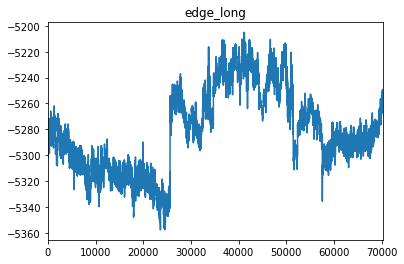

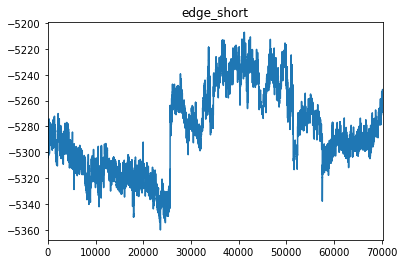

"\n#\xe9\x80\x89\xe6\x8b\xa9collection\xe5\x92\x8cdocument\ndocs = tick_db['edge_short'].find(time_query).sort([('datetime', pymongo.ASCENDING)])\nresult = pd.DataFrame(list(docs))\nresult.value.plot(title='edge_short')\nplt.show()\n"

In [25]:
# encoding:utf-8
# 画出某个database的某个collection的某个column
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
# 选择数据库
tick_db = default_client['cross_border']
edge_long_list = []
edge_short_list = []

date_list = [datetime.date(2017, 7, 3) + x for x in [datetime.timedelta(days=y) for y in range(3)]]
for trading_d in date_list:
    start_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 9, 0, 0)
    end_datetime1 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 15, 0)
    start_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 10, 30, 0)
    end_datetime2 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 11, 30, 0)
    start_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 13, 30, 0)
    end_datetime3 = datetime.datetime(trading_d.year, trading_d.month, trading_d.day, 15, 0, 0)

    time_query = {
        '$or':[{'datetime':{'$gte':start_datetime1, '$lte':end_datetime1}},
        {'datetime':{'$gte':start_datetime2, '$lte':end_datetime2}},
        {'datetime':{'$gte':start_datetime3, '$lte':end_datetime3}}
        ],
        'value': {'$gte': -5500, '$lte': -5000}
    }


    #选择collection和document
    docs_long = tick_db['edge_long'].find(time_query).sort([('datetime', pymongo.ASCENDING)])
    edge_long_list += list(docs_long)
    
    docs_short = tick_db['edge_short'].find(time_query).sort([('datetime', pymongo.ASCENDING)])
    edge_short_list += list(docs_short)
    
result_long = pd.DataFrame(edge_long_list)
result_long.value.plot(title='edge_long')
plt.show()

result_short = pd.DataFrame(edge_short_list)
result_short.value.plot(title='edge_short')
plt.show()
'''
#选择collection和document
docs = tick_db['edge_short'].find(time_query).sort([('datetime', pymongo.ASCENDING)])
result = pd.DataFrame(list(docs))
result.value.plot(title='edge_short')
plt.show()
'''

In [29]:
dome_sign = 'cu'
dome_expire_year = ['17', '18']
dome_expire_month = ['01', '02', '03', '04', '05',
        '06', '07', '08', '09', '10', '11', '12']
dome_all_symbols = [dome_sign + x + y
    for x in dome_expire_year for y in dome_expire_month]

fore_sign = 'HG'
fore_expire_year = ['7', '8']
fore_expire_month = ['F', 'G', 'H', 'J', 'K', 'M',
        'N', 'Q', 'U', 'V', 'X', 'Z']
fore_all_symbols = [fore_sign + x + y
    for y in fore_expire_year for x in fore_expire_month]

symbol_pair = zip(dome_all_symbols, fore_all_symbols)
print(symbol_pair)

[('cu1701', 'HGF7'), ('cu1702', 'HGG7'), ('cu1703', 'HGH7'), ('cu1704', 'HGJ7'), ('cu1705', 'HGK7'), ('cu1706', 'HGM7'), ('cu1707', 'HGN7'), ('cu1708', 'HGQ7'), ('cu1709', 'HGU7'), ('cu1710', 'HGV7'), ('cu1711', 'HGX7'), ('cu1712', 'HGZ7'), ('cu1801', 'HGF8'), ('cu1802', 'HGG8'), ('cu1803', 'HGH8'), ('cu1804', 'HGJ8'), ('cu1805', 'HGK8'), ('cu1806', 'HGM8'), ('cu1807', 'HGN8'), ('cu1808', 'HGQ8'), ('cu1809', 'HGU8'), ('cu1810', 'HGV8'), ('cu1811', 'HGX8'), ('cu1812', 'HGZ8')]


In [70]:
# encoding:utf-8
# 画出某个合约的tick走势
import datetime
import pymongo

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 创建服务器
default_client = pymongo.MongoClient('localhost', 27017)
# 选择数据库
tick_db = default_client['cross_border_edge']

datetime1 = datetime.datetime(2017, 6, 26, 9, 18, 0)
datetime2 = datetime.datetime(2017, 6, 26, 10, 8, 0)
# projection是list形式
query_ = {
    'datetime':{'$gt': datetime1, '$lt': datetime2},
}

columns = ['askPrice1', 'bidPrice1', 'askVolume1', 'bidVolume1']
columns_d = [column+'_d' for column in columns]
columns_f = [column+'_f' for column in columns]
columns_all = columns_d + columns_f + ['datetime']
#选择collection和document
docs = tick_db['edge_cu1709_HG7U'].find(query_, columns_all).sort([('datetime', pymongo.ASCENDING)])
print(len(list(docs)))
print(list(docs))


result = pd.DataFrame(list(docs))
print(result)
result.index = result.datetime
result.edge.plot()
plt.show()


355
[]
Empty DataFrame
Columns: []
Index: []


AttributeError: 'DataFrame' object has no attribute 'datetime'